In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [134]:
df = pd.read_parquet('data/hurdat2.parquet')

In [135]:
# Filter data to start from 2004, when wind radii data begins, and only include hurricanes
df = df[(df['Year'] >= 2004) & (df.Status == 'HU')]

In [138]:
# Calculate Average Wind radii for different wind speeds
wind_34_cols = ['34NE', '34SE', '34SW', '34NW']
wind_50_cols = ['50NE', '50SE', '50SW', '50NW']
wind_64_cols = ['64NE', '64SE', '64SW', '64NW']

df['34kt_Radius'] = df[wind_34_cols].mean(axis=1)
df['50kt_Radius'] = df[wind_50_cols].mean(axis=1)
df['64kt_Radius'] = df[wind_64_cols].mean(axis=1)

In [139]:
# exclude storms without a maximum wind speed radius recorded
df_filtered = df.loc[df[['34kt_Radius', '50kt_Radius', '64kt_Radius']].max(axis=1) > 0].reset_index(drop=True)

In [140]:
result = df_filtered.groupby('Year')[['34kt_Radius', '50kt_Radius', '64kt_Radius']].agg(['mean', 'std', 'count'])

In [141]:
# Flatten the MultiIndex columns
result.columns = ['_'.join(col).lower() for col in result.columns]

In [142]:
result = result.reset_index()

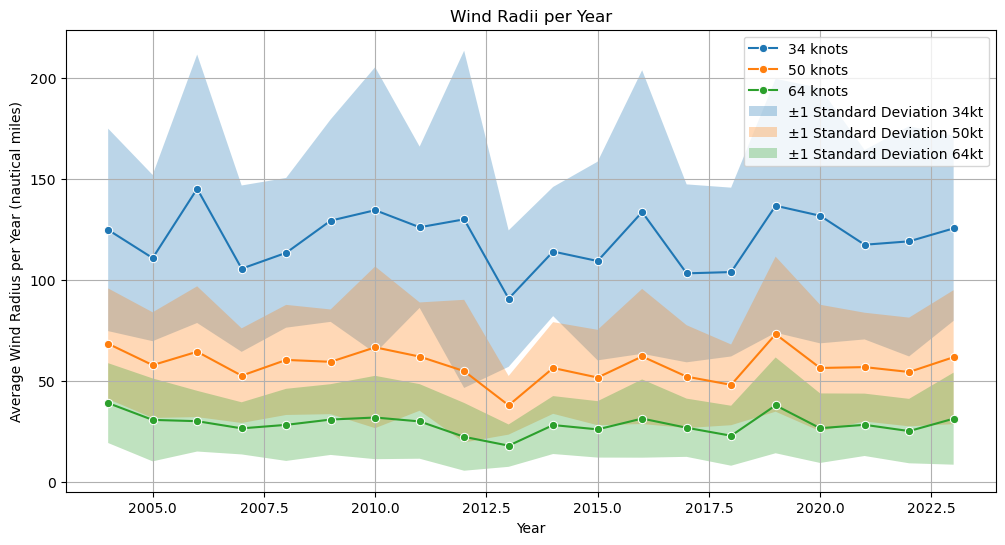

In [146]:
years = result['Year']
mean_34kt = result['34kt_radius_mean']
std_34kt = result['34kt_radius_std']
mean_50kt = result['50kt_radius_mean']
std_50kt = result['50kt_radius_std']
mean_64kt = result['64kt_radius_mean']
std_64kt = result['64kt_radius_std']

# Plotting the Average 34-knot Wind Radius over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=result, x='Year', y='34kt_radius_mean', marker='o', linestyle='-', label='34 knots')
sns.lineplot(data=result, x='Year', y='50kt_radius_mean', marker='o', linestyle='-', label='50 knots')
sns.lineplot(data=result, x='Year', y='64kt_radius_mean', marker='o', linestyle='-', label='64 knots')

plt.fill_between(years, mean_34kt - std_34kt, mean_34kt + std_34kt, alpha=0.3, label='±1 Standard Deviation 34kt')
plt.fill_between(years, mean_50kt - std_50kt, mean_50kt + std_50kt, alpha=0.3, label='±1 Standard Deviation 50kt')
plt.fill_between(years, mean_64kt - std_64kt, mean_64kt + std_64kt, alpha=0.3, label='±1 Standard Deviation 64kt')
plt.xlabel('Year')
plt.ylabel('Average Wind Radius per Year (nautical miles)')
plt.legend()
plt.title('Wind Radii per Year')
plt.grid(True)

There is no evidence of an evolution in wind radius between 2004-present. It's not worth fitting lines to verify because this fact can be readily read from the figure.